In [376]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

opened_webpage = requests.get("https://en.wikipedia.org/wiki/Population_growth")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

BeautifulSoup and Pandas are already installed and imported
Webpage opened successfully...
Webpage loaded and parsed successfully...


In my code, I begin by attempting to import the necessary libraries, BeautifulSoup and Pandas. This is done within a try-except block to check if they are already installed. If they are, I print a message indicating that they are successfully imported.

If the libraries are not found, I use a different method to install them. First, I import the `sys` module. Then, I utilize the `conda` package manager to install BeautifulSoup and Pandas within the current environment by running specific command-line commands. After a successful installation, I import these libraries, ensuring they are available for use, and then print a message to confirm their installation.

Next, I import the `requests` library to handle web requests. I make an HTTP GET request to the URL "https://en.wikipedia.org/wiki/Population_growth," which opens the webpage. I print a message to indicate the successful opening of the webpage.

I create a BeautifulSoup object (`bs`) to parse the content of the opened webpage. This is essential for extracting structured data from the HTML content of the webpage. I specify the HTML parser for BeautifulSoup, and again, I print a success message to confirm that the webpage has been loaded and parsed successfully.

These steps prepare the environment and load the webpage, making it ready for further web scraping or data extraction operations.

In [377]:
raw_data = []

table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\nPopulation[15]\n\n\n\n\nYearspassed\n\nYear\n\nPop.(billions)\n\n\n–\n1800\n1\n\n\n127\n1927\n2\n\n\n33\n1960\n3\n\n\n14\n1974\n4\n\n\n13\n1987\n5\n\n\n12\n1999\n6\n\n\n12\n2011\n7\n\n\n11\n2022\n8\n\n\n14\n2037*\n9\n\n\n18\n2055*\n10\n\n\n33\n2088*\n11\n\n\n*World Population Prospects 2017(United Nations Population Division)\n', '   \xa0\xa07–8 children \xa0\xa06–7 children   \xa0\xa05–6 children \xa0\xa04–5 children   \xa0\xa03–4 children \xa0\xa02–3 children   \xa0\xa01–2 children \xa0\xa00–1 children ', 'Graphs are temporarily unavailable due to technical issues.', "\nGrowth rates of the world's most populous countries\n\n\nRank\n\nCountry\n\nPopulation\n\nAnnual Growth (%)\n\n\n1990\n\n2010\n\n2020 (est.)[40]\n\n1990–2010\n\n2010–2020\n\n\n\n\nWorld\n\n5,306,425,000\n\n6,895,889,000\n\n7,503,828,180\n\n1.3%\n\n0.8%\n\n\n1\n\n China\n\n1,139,060,000\n\n1,341,335,000\n\n1,384,688,986\n\n0.8%\n\n0.3%\n\n\n2\n\n India\n\n873,785,000\n\n1,224,614,000\n\n1,296,834,042\n\n1.7%\n\n0.6

I collected data from wikipedia using Beautiful Soup and stored it in the 'table' HTML element. Then, I extracted the text from each row within these tables and added them to a list called 'raw_data'. Finally, I printed out the 'raw_data' to check and review the collected information.

In [378]:
column_names = ["Country/territory", "Population in 1967", "Population in 1990", "Population in 1994", "Population in 2002", "Population in 2008", "Life expectancy in years (2008)", "Total population growth from 1960s to 2007-2011"]

raw_data = "\n\nCountry/territory\n\nPopulation in\n\nLife expectancyin years (2008)\n\nTotal populationgrowth from 1960sto 2007-2011\n\n\n1967\n\n1990\n\n1994\n\n2002\n\n2008\n\n\n Eritrea\nN/A\nN/A\n3,437,000\n4,298,269\n5,673,520\n61\n2,236,520\n\n\n Ethiopia\n23,457,000\n50,974,000 \n54,939,000\n67,673,031\n79,221,000\n55\n55,764,000\n\n\n Sudan\n14,355,000\n25,204,000 \n27,361,000\n38,114,160 \n42,272,000\n50\n27,917,000\n\n\n Chad\n3,410,000\n5,679,000\n6,183,000\n9,253,493\n10,329,208 \n47\n6,919,205\n\n\n Niger\n3,546,000\n7,732,000\n8,846,000\n10,790,352 \n15,306,252 \n44\n11,760,252\n\n\n Nigeria\n61,450,000\n88,500,000\n108,467,000\n129,934,911\n158,259,000\n47\n96,809,000\n\n\n Mali\n4,745,000\n8,156,000\n10,462,000\n11,340,480\n14,517,176\n50\n9,772,176\n\n\n Mauritania\n1,050,000\n2,025,000 \n2,211,000\n2,667,859 \n3,291,000 \n54\n2,241,000\n\n\n Senegal\n3,607,000\n7,327,000\n8,102,000\n9,967,215\n13,711,597 \n57\n10,104,597\n\n\n Gambia\n343,000\n861,000\n1,081,000\n1,367,124 \n1,705,000\n55\n1,362,000\n\n\n Algeria\n11,833,126 \n25,012,000\n27,325,000 \n32,818,500 \n34,895,000\n74\n23,061,874\n\n\n The DRC/Zaire\n16,353,000\n35,562,000\n42,552,000\n55,225,478  \n70,916,439 \n54\n54,563,439\n\n\n Egypt\n30,083,419 \n53,153,000\n58,326,000\n70,712,345 \n79,089,650 \n72\n49,006,231\n\n\n Réunion(overseas region of France)\n418,000\nN/A\nN/A\n720,934 \n827,000  \nN/A\n409,000\n\n\n Falkland Islands(British Overseas Territory)\n2,500\nN/A\nN/A\n2,967 \n3,140\nN/A\n640\n\n\n Chile\n8,935,500\n13,173,000\n13,994,000\n15,116,435\n17,224,200 \n77\n8,288,700\n\n\n Colombia\n19,191,000\n32,987,000\n34,520,000\n41,088,227\n45,925,397 \n73\n26,734,397\n\n\n Brazil\n85,655,000\n150,368,000\n153,725,000\n174,468,575 \n190,732,694  \n72\n105,077,694\n\n\n Mexico\n45,671,000\n86,154,000\n93,008,000\n103,400,165 \n112,322,757 \n76\n66,651,757\n\n\n Fiji\n476,727 \n765,000\n771,000\n844,330 \n849,000 \n70\n372,273\n\n\n Nauru\n6,050 \n10,000\nN/A\n12,329\n9,322 \nN/A\n3,272\n\n\n Jamaica\n1,876,000\n2,420,000\n2,429,000\n2,695,867 \n2,847,232\n74\n971,232\n\n\n Australia\n11,540,764 \n17,086,000\n17,843,000\n19,546,792 \n26,644,023 \n82\n10,066,508\n\n\n Albania\n1,965,500 \n3,250,000\n3,414,000\n3,510,484\n2,986,952 \n78\n1,021,452\n\n\n Poland\n31,944,000\n38,180,000\n38,554,000\n38,626,349 \n38,192,000 \n75\n6,248,000\n\n\n Hungary\n10,212,000\n10,553,000\n10,261,000\n10,106,017\n9,979,000 \n73\n-142,000\n\n\n Bulgaria\n8,226,564 \n8,980,000\n8,443,000\n7,707,495\n7,351,234 \n73\n-875,330\n\n\n United Kingdom\n55,068,000 (1966)\n57,411,000\n58,091,000\n58,789,194\n62,008,048 \n79\n7,020,048\n\n\n Ireland\n2,884,002 (1966)\n3,503,000\n3,571,000\n3,840,838 \n4,470,700 \n78\n1,586,698\n\n\n People's Republic of China\n720,000,000\n1,139,060,000\n1,208,841,000\n1,286,975,468 (2004)\n1,339,724,852 \n73\n619,724,852\n\n\n Japan‡\n98,274,961 (1965)\n123,537,000\n124,961,000\n127,333,002\n127,420,000 \n82\n28,123,865\n\n\n India#\n511,115,000\n843,931,000\n918,570,000\n1,028,610,328 \n1,210,193,422 \n69\n699,078,422\n\n\n Singapore\n1,956,000 (1967)\n3,003,000 (1990) \n2,930,000 (1994)\n4,452,732 (2002)\n5,076,700 \n82 (2008)\n3,120,700\n\n\n Monaco\n24,000 (1967)\n29,000 (1990) \nN/A (1994)\n31,842 \n35,586 \n(2008)\n11,586\n\n\n Greece\n8,716,000 (1967)\n10,123,000 (1990) \n10,426,000 (1994)\n10,964,020 \n11,305,118 \nN/A (2008)\n2,589,118\n\n\n Faroe Islands(Danish dependency)\n38,000 (1967)\nN/A (1990) \nN/A (1994)\n46,345 \n48,917  \nN/A  (2008)\n18,917\n\n\n Liechtenstein\n20,000 (1967)\n29,000 (1990) \nN/A (1994)\n33,307 \n35,789 \n(2008)\n15,789\n\n\n South Korea\n29,207,856 (1966)\n42,793,000 (1990) \n44,453,000 (1994)\n48,324,000 \n48,875,000  \n(2008)\n19,667,144\n\n\n North Korea\n12,700,000 (1967)\n21,773,000 (1990) \n23,483,000 (1994)\n22,224,195 (2002)\n24,051,218 \n(2008)\n11,351,218\n\n\n Brunei\n107,200 (1967)\n266,000 (1990) \n280,000 (1994)\n332,844 \n401,890 \n76 (2008)\n306,609\n\n\n Malaysia\n10,671,000 (1967)\n17,861,000 (1990) \n19,489,000 (1994)\n21,793,293 (2002)\n27,565,821 \n(2008)\n16,894,821\n\n\n Thailand\n32,680,000 (1967)\n57,196,000 (1990) \n59,396,000 (1994)\n60,606,947 \n63,878,267 [81]\n(2008)\n31,198,267\n\n\n Lebanon\n2,520,000 (1967)\n2,701,000 (1990) \n2,915,000 (1994)\n3,727,703[82] \n4,224,000 \n- (2008)\n\n\n\n Syria\n5,600,000 (1967)\n12,116,000 (1990) \n13,844,000 (1994)\n17,585,540 \n22,457,763 [83]\n-(2008)\n\n\n\n Bahrain\n182,00 (1967)\n503,000 (1990) \n549,000 (1994)\n667,238 \n1,234,596[84] \n75 (2008)\n\n\n\n Sri Lanka\n11,741,000 (1967)\n16,993,000 (1990) \n17,685,000 (1994)\n19,607,519 (2002)\n20,238,000 \n- (2008)\n\n\n\n Switzerland\n6,050,000 (1967)\n6.712,000 (1990) \n6,994,000 (1994)\n7,261,200 (2002)\n7,866,500[85] \n- (2008)\n\n\n\n Luxembourg\n335,000 (1967)\n381,000 (1990) \n401,000 (1994)\n439,539 \n511,840 [86]\n- (2008)\n\n\n\n Romania\n19,105,056 (1966)\n23,200,000 (1990)\n22,736,000 (1994)\n21,680,974 (2002)\n21,466,174[87] \n- (2008)\n\n\n\n Niue(associated state of New Zealand)\n1,900 (1966)\nN/A (1990)\nN/A (1994)\n2,134 (2002)\n1,398 [88]\nN/A (2008)\n-502\n\n\n Tokelau(New Zealand territory)\n5,194 (1966)\nN/A (1990)\nN/A (1994)\n1,445 \n1,416 \nN/A (2008)\n-3,778\n\n\n Jamaica\n1,876,000 (1967)\n2,420,000 (1990) \n2,429,000 (1994)\n2,695,867 \n2,847,232 \n74 (2008)\n971,232\n\n\n Argentina\n32,031,000 (1967)\n32,322,000 (1990)\n34,180,000 (1994)\n37,812,817 (2002)\n40,091,359 \n74 (2008)\n8,060,359\n\n\n France\n49,890,660 (1967)\n56,440,000 (1990)\n57,747,000 (1994)\n59,551,000 \n63,136,180 [89]\n81 (2008)\n\n\n\n Italy\n52,334,000 (1967)\n57,662,000 (1990)\n57,193,000 (1994)\n56,995,744 (2002)\n60,605,053[90] \n80 (2008)\n\n\n\n Mauritius\n774,000 (1967)\n1,075,000 (1990)\n1,104,000 (1994)\n1,179,137 \n1,288,000 \n75 (2008)\n514,000\n\n\n Guatemala\n4,717,000 (1967)\n9,197,000 (1990)\n10,322,000 (1994)\n12,974,361 \n13,276,517 \n70 (2008)\n8,559,517\n\n\n Cuba\n8,033,000 (1967)\n10,609,000 (1990)\n10,960,000 (1994)\n11,177,743 (2002)\n11,239,363 [91]\n77 (2008)\n\n\n\n Barbados\n246,000 (1967)\n255,000 (1990) \n261,000 (1994)\n250,012 \n284,589 \n73 (2008)\n18,589\n\n\n Samoa\n131,377 (1967)\n164,000 (1990) \n164,000 (1994)\n178,173 \n179,000 \nN/A (2008)\n\n\n\n Sweden\n7,765,981 (1967)\n8,559,000 (1990) \n8,794,000 (1994)\n8,920,705 (2002)\n9,354,462 \n81 (2008)\n\n\n\n Finland\n4,664,000 (1967)\n4,986,000 (1990) \n5,095,000 (1994)\n5,175,783 (2002)\n5,374,781 \nN/A (2008)\n\n\n\n Portugal\n9,440,000 (1967)\n10,525,000 (1990)\n9,830,000 (1994)\n10,355,824 \n10,647,763[92] \nN/A (2008)\n\n\n\n Austria\n7,323,981 (1967)\n7,712,000 (1990) \n8,031,000 (1994)\n8,032,926 \n8,404,252 \nN/A (2008)\n\n\n\n Libya\n1,738,000 (1967)\n4,545,000 (1990)\n5,225,000(1994)\n5,499,074 (2002)\n6,420,000 \n77 (2008)\n\n\n\n Peru\n12,385,000 (1967)\n21,550,000 (1990)\n23,080,000(1994)\n27,949,639 (2002)\n29,496,000 \n70 (2008)\n\n\n\n Guinea Bissau\n528,000 (1967)\n965,000 (1990) \n1,050,000 (1994)\n1,345,479 (2002)\n1,647,000 \n48 (2008)\n\n\n\n Angola\n5,203,066 (1967)\n10,020,000 (1990)\n10,674,000 (1994)\n10,766,500 \n18,498,000[93] \n38 (2008)\n\n\n\n Equatorial Guinea\n277,000 (1967)\n348,000 (1990)\n389,000 (1994)\n474,214 \n676,000 \n61 (2008)\n\n\n\n Benin\n2,505,000 (1967)\n4,736,000 (1990)\n5,246,000 (1994)\n8,500,500 (2002)\n8,791,832 \n59 (2008)\n\n\n\n Laos\n2,770,000 (1967)\n4,139,000 (1990)\n4,742,000 (1994)\n5,635,967 (2002)\n6,800,000[94] \n56 (2008)\n\n\n\n Nepal\n10,500,000 (1967)\n18,961,000 (1990)\n21,360,000 (1994)\n25,284,463 (2002)\n29,331,000 \n- (2008)\n\n\n\n Iran\n25,781,090 (1966)\n54,608,000 (1990)\n59,778,000 (1994)\n66,622,704 (2002)\n75,330,000 [95]\n71 (2008)\n49,548,910\n\n\n Canada\n20,014,880 (1966)\n26,603,000 (1990)\n29,248,000(1994)\n31,081,900 \n32,623,490 [96]\n81 (2008)\n\n\n\n United States\n199,118,000 (1967)\n249,995,000 (1990)\n260,650,00(1994)\n281,421,906 \n308,745,538 [97]\n78 (2008)\n\n\n\n Uganda\n7,931,000 (1967)\n18,795,000 (1990)\n20,621,000 (1994)\n24,227,297 (2002)\n32,369,558 \n52 (2008)\n\n"

rows = raw_data.split("\n\n\n")

import pandas as pd

data_dicts = []
for row in rows[3:29]:
    row_data = row.split("\n")
    data_dict = {column_names[i]: row_data[i] for i in range(len(column_names))}
    data_dicts.append(data_dict)
    
df = pd.DataFrame(data_dicts)
df

,Country/territory,Population in 1967,Population in 1990,Population in 1994,Population in 2002,Population in 2008,Life expectancy in years (2008),Total population growth from 1960s to 2007-2011
0,Ethiopia,"23,457,000","50,974,000","54,939,000","67,673,031","79,221,000",55,"55,764,000"
1,Sudan,"14,355,000","25,204,000","27,361,000","38,114,160","42,272,000",50,"27,917,000"
2,Chad,"3,410,000","5,679,000","6,183,000","9,253,493","10,329,208",47,"6,919,205"
3,Niger,"3,546,000","7,732,000","8,846,000","10,790,352","15,306,252",44,"11,760,252"
4,Nigeria,"61,450,000","88,500,000","108,467,000","129,934,911","158,259,000",47,"96,809,000"
5,Mali,"4,745,000","8,156,000","10,462,000","11,340,480","14,517,176",50,"9,772,176"
6,Mauritania,"1,050,000","2,025,000","2,211,000","2,667,859","3,291,000",54,"2,241,000"
7,Senegal,"3,607,000","7,327,000","8,102,000","9,967,215","13,711,597",57,"10,104,597"
8,Gambia,"343,000","861,000","1,081,000","1,367,124","1,705,000",55,"1,362,000"
9,Algeria,"11,833,126","25,012,000","27,325,000","32,818,500","34,895,000",74,"23,061,874"


I processed the raw data in the following steps to create a DataFrame:

**1. Define Column Names:**
   - I defined a list called `column_names` which contains the names of the columns you want in the DataFrame.

**2. Raw Data Extraction:**
   - I extracted the raw data, which was a long string containing information about countries, populations, and life expectancy.

**3. Data Splitting:**
   - I split the raw data into rows using the `split("\n\n\n")` method. This created a list of rows, where each row represented data for a specific country.

**4. Data Transformation:**
   - I then created an empty list called `data_dicts` to store dictionaries. Each dictionary will represent the data for one country.

**5. Loop Through Rows:**
   - I iterated through the rows starting from the 4th row (index 3) to the 29th row. These rows contain data for individual countries.

**6. Split Rows:**
   - For each row, I split the data using `split("\n")`, which created a list of values for each country.

**7. Create Data Dictionary:**
   - I created a data dictionary for each country by mapping the values in the row to the corresponding column names.

**8. Append to List:**
   - I appended each data dictionary to the `data_dicts` list.

**9. Create DataFrame:**
   - Finally, I used `pd.DataFrame(data_dicts)` to create a DataFrame from the list of data dictionaries. The resulting DataFrame contains the data organized by the specified column names.

This process structured the raw data into a DataFrame where each row represents a country, and each column represents a specific attribute of that country, such as its population in different years and life expectancy.

In [389]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

df.info()

 Number of duplicates before : 0
 Number of duplicates after removing : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Country/territory                                26 non-null     object
 1   Population in 1967                               26 non-null     object
 2   Population in 1990                               26 non-null     object
 3   Population in 1994                               26 non-null     object
 4   Population in 2002                               26 non-null     object
 5   Population in 2008                               26 non-null     object
 6   Life expectancy in years (2008)                  26 non-null     object
 7   Total population growth from 1960s to 2007-2011  26 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


1. **Identify Duplicates Before Cleaning:**
   - First, I calculated the number of duplicate rows in the DataFrame `final_data` by using the `duplicated()` method followed by `sum()`. 
   - This provides me with the count of rows that have identical values in all columns, which can indicate data redundancy or errors.
   - I printed out the number of duplicates using `print()`, making it clear that I'm looking at duplicates before any cleaning operations.
   - This step is crucial to understand the initial data quality.

2. **Remove Duplicates:**
   - To enhance data quality, I proceeded to remove the duplicate rows from `final_data` using the `drop_duplicates()` method.
   - This ensures that each row in the DataFrame is unique and can help avoid misleading analysis results.
   
3. **Identify Duplicates After Removal:**
   - After removing the duplicates, I once again calculated the number of duplicate rows in the cleaned `final_data` using the same process.
   - The purpose is to confirm that the duplicates have indeed been removed. The count should ideally be zero after the cleaning process.
   - I printed this count to provide a comparison of duplicates before and after the removal.

4. **DataFrame Information:**
   - To get an overview of the DataFrame and its columns, I called the `info()` method on `final_data`.
   - This method displays information such as the number of non-null entries, data types of columns, and memory usage.
   - Reviewing this information is essential to understand the structure of the cleaned data and ensure its readiness for analysis.

These steps collectively serve to assess and improve data quality by identifying and removing duplicates, ultimately ensuring that the DataFrame is prepared for further analysis.

In [390]:
df = df.dropna()
df

df.to_csv("population_growth.csv")

,Country/territory,Population in 1967,Population in 1990,Population in 1994,Population in 2002,Population in 2008,Life expectancy in years (2008),Total population growth from 1960s to 2007-2011
0,Ethiopia,"23,457,000","50,974,000","54,939,000","67,673,031","79,221,000",55,"55,764,000"
1,Sudan,"14,355,000","25,204,000","27,361,000","38,114,160","42,272,000",50,"27,917,000"
2,Chad,"3,410,000","5,679,000","6,183,000","9,253,493","10,329,208",47,"6,919,205"
3,Niger,"3,546,000","7,732,000","8,846,000","10,790,352","15,306,252",44,"11,760,252"
4,Nigeria,"61,450,000","88,500,000","108,467,000","129,934,911","158,259,000",47,"96,809,000"
5,Mali,"4,745,000","8,156,000","10,462,000","11,340,480","14,517,176",50,"9,772,176"
6,Mauritania,"1,050,000","2,025,000","2,211,000","2,667,859","3,291,000",54,"2,241,000"
7,Senegal,"3,607,000","7,327,000","8,102,000","9,967,215","13,711,597",57,"10,104,597"
8,Gambia,"343,000","861,000","1,081,000","1,367,124","1,705,000",55,"1,362,000"
9,Algeria,"11,833,126","25,012,000","27,325,000","32,818,500","34,895,000",74,"23,061,874"


I removed any rows with missing values from the DataFrame using the `.dropna()` method. This step ensures that the data is clean and does not contain any rows with missing or incomplete information.

After cleaning the data, I saved the resulting DataFrame to a CSV file named "population_growth.csv" using the `.to_csv()` method. This allows for easy storage and sharing of the cleaned dataset for further analysis or use in other applications.

In [383]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


As I began my next section on this code, my first step was to import the essential libraries to help with data analysis and visualization. I imported the following libraries:

1. **pandas (pd):** I brought in the pandas library, a powerful tool for data manipulation and analysis. It would allow me to work with datasets effectively.

2. **numpy (np):** I also imported numpy, a fundamental library for numerical operations in Python. It provides support for handling arrays and mathematical functions.

3. **scipy:** To further enhance my capabilities for scientific and technical computing, I included the scipy library. This library would be beneficial for more advanced data analysis.

4. **matplotlib.pyplot (plt):** For creating data visualizations, I added the pyplot module from the matplotlib library. It would enable me to generate various plots and charts.

After successfully importing these libraries, I received a confirmation message that all the libraries were loaded successfully. With these tools at my disposal, I was well-prepared to tackle data analysis and visualization tasks.

In [384]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

population_growth_df = pd.read_csv("population_growth.csv")

population_growth_df['Population in 1967'] = population_growth_df['Population in 1967'].str.replace(',', '', regex=True)

population_growth_df['Population in 1967'] = pd.to_numeric(population_growth_df['Population in 1967'])

population_growth_df['Population in 2008'] = population_growth_df['Population in 2008'].str.replace(',', '', regex=True)

population_growth_df['Population in 2008'] = pd.to_numeric(population_growth_df['Population in 2008'])

population_growth_df

,Unnamed: 0,Country/territory,Population in 1967,Population in 1990,Population in 1994,Population in 2002,Population in 2008,Life expectancy in years (2008),Total population growth from 1960s to 2007-2011
0,0,Ethiopia,23457000,"50,974,000","54,939,000","67,673,031",79221000,55,"55,764,000"
1,1,Sudan,14355000,"25,204,000","27,361,000","38,114,160",42272000,50,"27,917,000"
2,2,Chad,3410000,"5,679,000","6,183,000","9,253,493",10329208,47,"6,919,205"
3,3,Niger,3546000,"7,732,000","8,846,000","10,790,352",15306252,44,"11,760,252"
4,4,Nigeria,61450000,"88,500,000","108,467,000","129,934,911",158259000,47,"96,809,000"
5,5,Mali,4745000,"8,156,000","10,462,000","11,340,480",14517176,50,"9,772,176"
6,6,Mauritania,1050000,"2,025,000","2,211,000","2,667,859",3291000,54,"2,241,000"
7,7,Senegal,3607000,"7,327,000","8,102,000","9,967,215",13711597,57,"10,104,597"
8,8,Gambia,343000,"861,000","1,081,000","1,367,124",1705000,55,"1,362,000"
9,9,Algeria,11833126,"25,012,000","27,325,000","32,818,500",34895000,74,"23,061,874"


1. **Reading the Data**: I started by reading the dataset from a CSV file named "population_growth.csv" into a Pandas DataFrame.

2. **Cleaning the 'Population in 1967' Column**: I focused on the 'Population in 1967' column, which initially had numbers with commas (e.g., 23,457,000). To make this data suitable for numeric analysis, I removed the commas from these values using the `str.replace()` method with a regex that matched and removed commas.

3. **Converting 'Population in 1967' to Numeric**: After removing the commas, I needed to ensure that the data in the 'Population in 1967' column was treated as numeric. So, I used the `pd.to_numeric()` function to convert this column into numeric data types.

4. **Cleaning the 'Population in 2008' Column**: Similarly, I repeated the process for the 'Population in 2008' column. I removed the commas from these values to prepare the data for numeric analysis.

5. **Converting 'Population in 2008' to Numeric**: Just like with the 'Population in 1967' column, I used the `pd.to_numeric()` function to ensure that the 'Population in 2008' column was recognized as numeric.

6. **Final DataFrame**: After these cleaning and conversion steps, the DataFrame 'population_growth_df' now contains the dataset with cleaned and numeric columns for 'Population in 1967' and 'Population in 2008'. This data is now ready for further analysis or visualization.

In [385]:
column_names = population_growth_df.columns
print (column_names)

pd.set_option('display.float_format', '{:.0f}'.format)

population1967 = population_growth_df['Population in 1967']
population1967
population1967.describe()

Index(['Unnamed: 0', 'Country/territory', 'Population in 1967',
       'Population in 1990', 'Population in 1994', 'Population in 2002',
       'Population in 2008', 'Life expectancy in years (2008)',
       'Total population growth from 1960s to 2007-2011'],
      dtype='object')


0     23457000
1     14355000
2      3410000
3      3546000
4     61450000
5      4745000
6      1050000
7      3607000
8       343000
9     11833126
10    16353000
11    30083419
12      418000
13        2500
14     8935500
15    19191000
16    85655000
17    45671000
18      476727
19        6050
20     1876000
21    11540764
22     1965500
23    31944000
24    10212000
25     8226564
Name: Population in 1967, dtype: int64

count         26
mean    15398198
std     20923859
min         2500
25%      1898375
50%      8581032
75%     18481500
max     85655000
Name: Population in 1967, dtype: float64

In [386]:
population2008 = population_growth_df['Population in 2008']
population2008
population2008.describe()

0      79221000
1      42272000
2      10329208
3      15306252
4     158259000
5      14517176
6       3291000
7      13711597
8       1705000
9      34895000
10     70916439
11     79089650
12       827000
13         3140
14     17224200
15     45925397
16    190732694
17    112322757
18       849000
19         9322
20      2847232
21     26644023
22      2986952
23     38192000
24      9979000
25      7351234
Name: Population in 2008, dtype: int64

count          26
mean     37669510
std      50284079
min          3140
25%       3062964
50%      14911714
75%      45012048
max     190732694
Name: Population in 2008, dtype: float64

1. **Collect Column Names:**
   - First, I collect the names of all the columns in the `population_growth_df` DataFrame using the `.columns` attribute.
   - To understand the structure of the data and the available columns, I print these column names to the console.

2. **Set Display Format:**
   - Next, I set the display format for numbers in the DataFrame to have no decimal places using `pd.set_option('display.float_format', '{:.0f}'.format)`.
   - This is done to ensure that any statistics or numbers displayed are rounded to whole numbers.

3. **Extract 'Population in 1967' Data:**
   - I extract the data from the column labeled 'Population in 1967' from the `population_growth_df` DataFrame.
   - This creates a new variable called `population1967` that contains the population data specifically for the year 1967.

4. **Display the 'Population in 1967' Data:**
   - To understand this specific population data better, I display it by typing `population1967`.
   - This shows the values in the 'Population in 1967' column.

5. **Generate Descriptive Statistics:**
   - To gain insights into the distribution of the 'Population in 1967' data, I use the `.describe()` method on the `population1967` variable.
   - This provides summary statistics such as the count, mean, standard deviation, minimum, and maximum values, as well as quartiles (25th, 50th, and 75th percentiles) for the population data in 1967.
   - These statistics help to understand the central tendency and spread of the population numbers for that specific year.

6. **Repeat Process**
   - I then repeated the process for the population data in 2008.

**Population in 1967:**
- **Count:** There are 26 data points in this dataset, indicating that data is available for 26 different regions or entities.
- **Mean:** The mean population in 1967 is approximately 15,398,198. This represents the average population size for these regions.
- **Standard Deviation (std):** The standard deviation is quite high, at approximately 20,923,859. This suggests that the population sizes in 1967 vary significantly from the mean, indicating a wide dispersion.
- **Min:** The minimum population is 2,500, which is the smallest population size among the regions in this dataset.
- **25%:** 25% of the regions had populations of 1,898,375 or lower.
- **50% (Median):** The median population, which is 8,581,032, represents the population size where half of the regions had a smaller population, and half had a larger population.
- **75%:** 75% of the regions had populations of 18,481,500 or lower.
- **Max:** The maximum population is 85,655,000, which is the largest population size among the regions in this dataset.

**Population in 2008:**
- **Count:** There are also 26 data points in this dataset, indicating that data is available for the same 26 regions or entities.
- **Mean:** The mean population in 2008 is significantly higher, at approximately 37,669,510. This shows that, on average, the population sizes in 2008 are larger than in 1967 for these regions.
- **Standard Deviation (std):** The standard deviation is approximately 50,284,079, indicating that the population sizes in 2008 still have a wide dispersion around the mean.
- **Min:** The minimum population in 2008 is 3,140, which is slightly larger than in 1967.
- **25%:** 25% of the regions had populations of 3,062,964 or lower.
- **50% (Median):** The median population, which is 14,911,714, is larger than in 1967, indicating population growth over this time frame.
- **75%:** 75% of the regions had populations of 45,012,048 or lower.
- **Max:** The maximum population in 2008 is 190,732,694, which is significantly larger than in 1967.

**Analysis:**
- The count of data points is the same for both years, indicating consistent data availability.
- The mean population significantly increased from 1967 to 2008, suggesting overall population growth in these regions.
- While the mean increased, the wide standard deviations indicate that there is still substantial variation in population sizes.
- The minimum populations increased slightly, indicating that even the smallest populations grew over time.
- The median population increased significantly, confirming that the majority of regions experienced population growth.
- The maximum population in 2008 is substantially larger, signifying that some regions saw substantial population expansion.

In summary, these statistics suggest that, on average, the regions in this dataset experienced population growth from 1967 to 2008, with some regions experiencing more significant growth than others. The wide standard deviations indicate that while there is a general trend of growth, there are still regions with diverse population dynamics.

{'whiskers': [<matplotlib.lines.Line2D at 0x2883d79a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2883d7430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2883d7c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2883dc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2883dc460>],
 'means': []}

Text(0.5, 0, 'year 1968')

Text(0, 0.5, 'population (10 millions)')

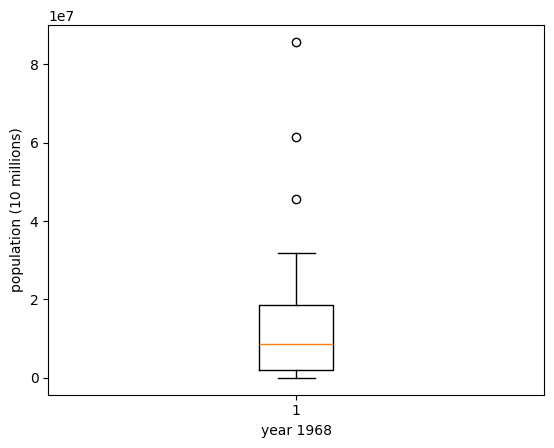

In [387]:
population1967_column = population_growth_df["Population in 1967"]

plt.boxplot(population1967_column)

plt.xlabel("year 1968")
plt.ylabel("population (10 millions)")

{'whiskers': [<matplotlib.lines.Line2D at 0x174e80130>,
 'caps': [<matplotlib.lines.Line2D at 0x174e84400>,
 'boxes': [<matplotlib.lines.Line2D at 0x174e803a0>],
 'medians': [<matplotlib.lines.Line2D at 0x174e84940>],
 'fliers': [<matplotlib.lines.Line2D at 0x174e84be0>],
 'means': []}

Text(0.5, 0, 'year 2008')

Text(0, 0.5, 'population (100 millions)')

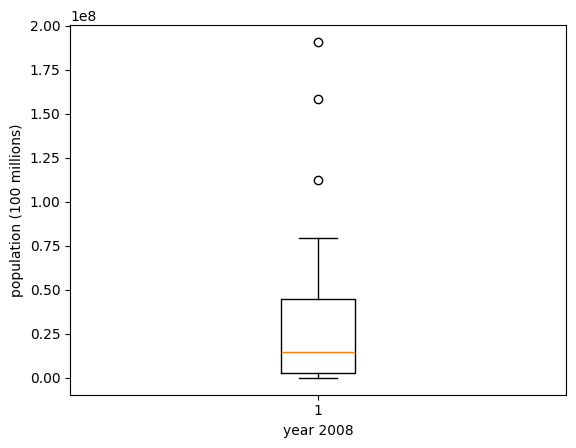

In [388]:
population2008_column = population_growth_df["Population in 2008"]

plt.boxplot(population2008_column)

plt.xlabel("year 2008")
plt.ylabel("population (100 millions)")

1. **Collection of Data**:
   I began by selecting both dataset columns from my dataset, which was stored in the DataFrame called `population_growth_df`. These columns contains population data for the years 1967 and 2008.

2. **Data Visualization**:
   To gain insights from this data, I decided to create two box plots. A box plot is a graphical representation of the distribution of data, showing the median, quartiles, and potential outliers.

3. **Setting Labels**:
   I added labels to the plot to make it more informative. The x-axis label was set to indicate that the data represents the year. The y-axis label was set to provide context for the data's scale.

4. **Conclusion**:
   By creating this box plot and adding labels, I aimed to visualize and understand the population data for both years more effectively. This plot helps viewers identify the median population, the range of values, and potential outliers in those specific years.